# Espacialización de variables hidroclimatológicas

Esta presentación está basada en el curso de Hidroclimatología que se encuentra en http://www.mathmodelling.org/hidroclimatologia.

## 1. Temperatura

Es un término utilizado para expresar la intensidad relativa del calor. Esta se identifica con la energía cinética de la translación de moleculas y de acuerdo con la teoría cinética de gases tiene su cero absoluto cuando la movilidad de las moleculas ha cesado totalmente. Esta también representa una habilidad de la materia de transferir calor a otros cuerpos. El calor no se transferirá si los cuerpos se encuentran a la misma temperatura.

Existen tres escalas de medición de la temperatura: *Fahrenheit, Centígrada (Celsius) y Kelvin.*

La temperatura del aire se mide en grados de la escala Celsius (***°C***) y se reporta con décimas de grados. Esta escala internacional de temperatura emitida en 1948, fue definida por la lectura de un instrumento patrón, mediante el cual es posible obtener de manera uniforme y reproducible, interpolaciones entre el punto de fusión del hielo (0 °C) y el punto normal de ebullición del agua (100 °C). La escala de temperatura absoluta (***K***) se define asignando la temperatura de 273,16 °K al punto triple del agua pura, también llamada escala de temperatura Kelvin o escala absoluta.

### 1.1. Peril altitudinal de la temperatura en la atmósfera

La atmósfera es una capa de aire (gaseosa) que rodea la superficie de la Tierra, variando su composición y su densidad en altura. Se divide en las siguientes capas en altura: troposfera, estratosfera, mesosfera, termosfera y exosfera (contacta con el espacio interplanetario). La atmósfera meteorológica está comprendida entre 0 y 30 km. La palabra procede del griego “atmos” que significa vapor y “staira” que significa esfera.

<center><img src="https://1.bp.blogspot.com/-slX0gO3yE-8/WK4rJ8C0wfI/AAAAAAAAEdk/QcA51Xf1Yk4GlXmhKlZ6d_gGuh6MwXxWgCPcB/s1600/01_atmosfera.gif"></center>
<center>Perfil altitudinal de la temperatura en la atmósfera.</center>
<center>Tomado de: http://antonioboveda.blogspot.com.co/2010/12/terminos-del-clima-tema-2.html</center>


Las capas de la atmósfera terrestre se listan a continuación:

**Troposfera**: Capa de la atmósfera terrestre que está en contacto con la superficie de la Tierra y se extiende hasta una altitud de unos 10 km aproximadamente; en ella se desarrollan todos los procesos meteorológicos y climáticos.

**Estratosfera**: Capa de la atmósfera terrestre que se extiende entre los 10 y los 50 km de altitud aproximadamente; en ella reina un perfecto equilibrio dinámico y una temperatura casi constante.

**Mesosfera**: Capa de la atmósfera terrestre que se extiende entre los 50 y los 80 km de altitud aproximadamente; en ella las temperaturas oscilan entre los 0 y los -80 °C.

**Termosfera**: Capa de la atmósfera terrestre que se extiende entre los 80 y los 500 km de altitud aproximadamente; en ella tienen lugar abundantes procesos de ionización en los cuales se originan grandes concentraciones de electrones libres.

**Exosfera**: Capa más externa de la atmósfera terrestre, que se extiende desde los 500 km de altitud aproximadamente hasta alturas no determinadas; constituye la transición de los gases atmosféricos hacia el espacio exterior.


En la troposfera, se presenta una relación casi lineal entre la temperatura y la altitud, de este modo se puede utilizar la siguiente expresión para determinar la temperatura en función de la elevación.

$$
T = \alpha H + \beta
$$

Donde:

$T$: Temperatura (°C).

$\alpha$: Gradiente altitudinal de temperatura.

$\beta$: Constante altitudinal de temperatura.



### 1.2. Isotermas
La temperatura anual promedio en la superficie de la tierra se encuentra entre 14°C y 15°C, pero existen grandes variaciones según la latitud, altitud y época del año. *Las líneas isotermicas son lineas imaginarias que unen los puntos del espacio en los que se mantiene el mismo valor de temperatura*.

<center><img src="https://1.bp.blogspot.com/-XMpql0WJqyg/WK4rKNaEdqI/AAAAAAAAEdk/aaz_1MW9Byghd-VtDN_MyJUOYrIXqOaTACPcB/s1600/02_isotermas.jpg" style="max-width:100%; width: 40%"></center>
<center>Ejemplo de un mapa de isotermas. Cortesía: John Chavarro.</center>


La información para el trabajo en clase se puede descargar [aquí](https://www.dropbox.com/sh/k3pzq8drdqour1i/AADJEGzmAHH2-_jYeb0sA5pqa?dl=0).

#### 1.2.1. Preparación de la información
Con las series de temperatura que se encuentran dentro del área de trabajo (depende del grupo) se calculan los promedios mensuales de largo plazo para cada una de las series; esta actividad se puede realizar en hoja de cálculo (Excel) o lo podemos hacer directamente en Python.

A continuación se presenta el código en Python para obtener los promedios mensuales multianuales de las temperaturas.

In [1]:
# Importar librerias necesarias
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def dividir_variables():
    """
    Esta funcion guarda un archivo para cada variable en el libro hc_data.xlsx.
    """
    xls_data = pd.ExcelFile('data/hc_data.xlsx')
    print(xls_data.sheet_names)
    
    for parametro in xls_data.sheet_names:
        print(parametro)
        nombre_salida = 'data/' + parametro + '_data.xlsx'
        df_parametro = xls_data.parse(parametro, index_col='Fecha')
        df_parametro.to_excel(nombre_salida, parametro)
    

In [3]:
# Leer archvivo de temperaturas y guardar datos en un dataframe de Pandas
xls_ts = pd.ExcelFile('data/TS_1_data.xlsx')
df_ts1 = xls_ts.parse('TS_1', index_col='Fecha')
print("Total series temperatura: " + str(df_ts1.shape))

# Leer el catalogo con las series que estan en mi zona de trabajo
xls_catalogo_g2 = pd.ExcelFile('data/Catalogo_G2.xlsx')
df_estaciones_ts1 = xls_catalogo_g2.parse('TS_1', index_col='Estacion')

# Las estaciones de interes estan en el indice del dataframe
estaciones_g2 = df_estaciones_ts1.index
df_ts1_g2 = df_ts1[estaciones_g2]
print("Series temperatura Grupo 2: " + str(df_ts1_g2.shape))

Total series temperatura: (738, 777)
Series temperatura Grupo 2: (738, 118)


In [4]:
# Crear un dataframe donde vamos a guardar las medias mensuales multianuales
col_prom_lp = range(1, 13)
df_prom_lp = pd.DataFrame(index=estaciones_g2, columns=col_prom_lp)

for month in col_prom_lp:
    df_prom_lp[month] = df_ts1_g2[df_ts1_g2.index.month == month].mean()

df_prom_lp.to_excel('data/Promedios_lp_ts1.xlsx', sheet_name='TS_1')
df_prom_lp.round(3).head()  # Se muestran los primeros 5 registros de los promedios de largo plazo

,1,2,3,4,5,6,7,8,9,10,11,12
Estacion,,,,,,,,,,,,
11025010,16.808,16.908,17.043,17.100,17.050,17.031,16.880,16.811,16.653,16.414,16.464,16.617
11035010,26.384,26.452,26.567,26.615,26.753,26.688,26.691,26.622,26.531,26.352,26.287,26.252
11035020,26.057,26.269,26.587,26.655,26.629,26.528,26.538,26.487,26.324,26.059,25.900,25.855
11045010,26.398,26.624,26.810,26.876,26.866,26.713,26.775,26.698,26.458,26.213,26.112,26.143
11075010,16.615,16.637,16.895,17.032,17.100,16.865,16.765,16.743,16.505,16.550,16.624,16.605


#### 1.2.2. Validación de la información para la regresión

Una vez se tienen los valores medios mensuales se realiza una regresión lineal para cada uno de los meses del año. A manera de ejemplo se toma el mes de enero. De la regresión se obtiene el valor del gradiente altitudinal de temperatura ($\alpha$) y la constante altitudinal de temperatura ($\beta$), así como el valor del $R^2$ de la regresión.

Previo a la regresión, hacemos una gráfica de los datos para ver si hay datos extraños en la misma.

Forma inicial de los datos: (118, 2)
Forma de los datos despues de eliminar los vacios: (112, 2)


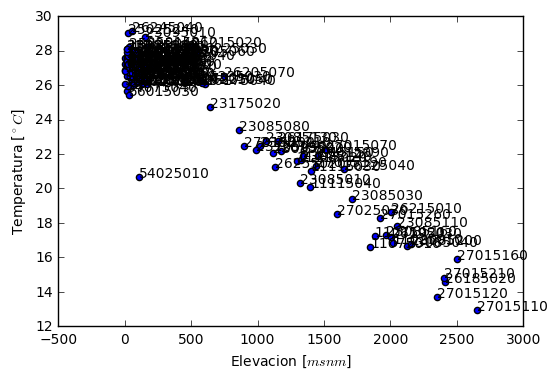

In [5]:
# Crear un dataframe con los datos para realizar la regresion (Elevacion vs Temperatura media del mes)
df_regresion = pd.DataFrame(df_estaciones_ts1['Elevacion'])
df_regresion[1] = df_prom_lp[1]
print("Forma inicial de los datos: " + str(df_regresion.shape))
df_regresion.dropna(axis=0, how='any', inplace=True)  # Borra las estaciones que no tienen algun dato (Elevacion o Temp.)
print("Forma de los datos despues de eliminar los vacios: " + str(df_regresion.shape))

# Crear grafico simple de Elevacion vs Temperatura media del mes
# df_regresion.plot(x='Elevacion', y=1, kind='scatter')
plt.scatter(df_regresion['Elevacion'], df_regresion[1])
plt.xlabel('Elevacion [' + r'$msnm$' + ']')
plt.ylabel('Temperatura [' + r'$^\circ C$' + ']')

# Poner el numero de la estacion en el punto correspondiente, solo para ver cuáles están por fuera de la regresión
for estacion in df_regresion.index:
    x_sta = df_regresion.loc[estacion, 'Elevacion']
    y_sta = df_regresion.loc[estacion, 1]
    plt.annotate(str(estacion), (x_sta, y_sta))

En este caso, se puede apreciar que la estación 54025010 se encuentra por fuera de los demás datos, que tienden hacia un comportamiento lineal. Se debe revisar al detalle lo que sucede con esta estación y, si es necesario, corregir su elevación. Para efectos de este ejercicio, esta estación será eliminada de la regresión.

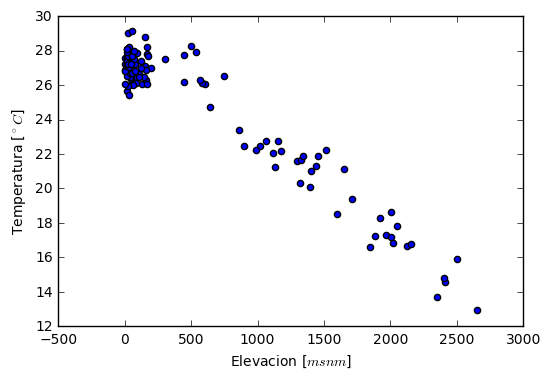

In [6]:
# Eliminar las estaciones que, muy seguramente, tienen mal las elevaciones
lista_borrar = [54025010]
df_regresion.drop(lista_borrar, inplace=True)

plt.scatter(df_regresion['Elevacion'], df_regresion[1])
plt.xlabel('Elevacion [' + r'$msnm$' + ']')
plt.ylabel('Temperatura [' + r'$^\circ C$' + ']')


#### 1.2.3. Regresión Lineal

Ya con los datos sin valores extraños, procedemos a realizar la regresión a través del paquete [**``scipy.stats``**](http://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html).

In [7]:
# Hacer la regresion lineal
reg_results = stats.linregress(x=df_regresion['Elevacion'], y=df_regresion[1])
alpha = reg_results[0]
beta = reg_results[1]
corr = reg_results[2]
r2 = corr ** 2
print("\nDatos de la regresion\nalpha = " + str(alpha) + '\nbeta = ' + str(beta) + '\nCorr = ' +
      str(corr) + '\nR2 = ' + str(r2))


Datos de la regresion
alpha = -0.00499157758767
beta = 27.6485046583
Corr = -0.966090034936
R2 = 0.933329955602


#### 1.2.4. Descarga Modelo de Elevación Digital (DEM)

De la página de la misión Shuttle Radar Topography Mission ([**``SRTM``**](http://srtm.csi.cgiar.org/SELECTION/inputCoord.asp)) se deben descargar las escenas requeridas para la zona de estudio.

<center><img src="https://2.bp.blogspot.com/-ZrMvUvFDcW0/WLeKasMTG8I/AAAAAAAAEek/Jg-G6ASrdSEq_JdhSVIZX4gp2kow9FKsQCLcB/s1600/srtm_map.png"></center>
<center>Pantalla de descarga de información SRTM.</center>

Las escenas descargadas se agregan a QGis y se combinan en un solo archivo ráster.

Finalmente, a través de la calculadora de mapas se aplica la fórmula de la isoterma para cada uno de los meses del año. En este ejemplo se realizó para el mes de enero.

